# Scikit-Learn 10mins

다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리로 간단하고 일관성 있는 API 제공

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [2]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import platform, sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"python platform={platform.architecture()}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
python platform=('64bit', '')
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


## Scikit-Learn 주요 모듈

https://scikit-learn.org/stable/modules/classes.html#

* sklearn.datasets: 예제 데이터 세트 및 데이터 생성 기능
* sklearn.preprocessing: 전처리 기능
* sklearn.feature_selection: feature 선택 기능 
* sklearn.feature_extraction: feature 추출 기능
* sklearn.decomposition: 차원 축소 기능
* sklearn.model_selection: 학습 데이터 분리 및 최적 하이퍼 파라미터 검색 기능
* sklearn.metrics: 모델에 대한 성능 측정 기능
* sklearn.pipeline: ML을 pipeline화 할 수 있는 기능
* sklearn.linear_model: 선형 모델
* sklearn.svm: 서포트 벡터 머신
* sklearn.tree: 트리 모델
* sklearn.ensemble: 앙상블 모델
* sklearn.neighbors: 최근접 이웃 알고리즘
* sklearn.naive_bayes: 나이브베이즈 알고리즘
* sklearn.cluster: 클러스터링 알고리즘  

## Scikit-Learn Quick Start

간단하게 머신러닝 예제를 통해 Scikit-Learn 의 주요 모듈을 사용하는 방법을 익혀 봅니다.

### Data Preparation

Scikit-Learn 에서는 내장하고 있는 예제 데이터셋도 있지만, 여기서는 Scikit-Learn에서 제공하는 데이터 생성기를 통해 간단하게 생성한 데이터를 가지고 머신러닝 알고리즘에 맞게 데이터를 준비해 보도록 하겠습니다.

data shape: xs=(1000, 1), ys=(1000,)


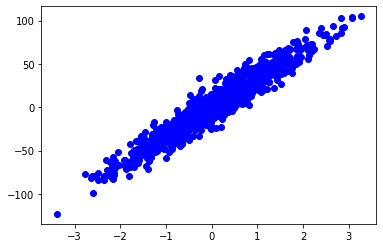

In [3]:
from sklearn import datasets

# Linear Regression 용 샘플 데이터셋 생성
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise= 10.0, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
plt.scatter(xs, ys, label='train', c='b')
plt.show()

Linear Model 인 LinearRegression 모델을 사용해 Regression 을 수행해 봅니다. 모델 학습 및 추후 평가를 위해 데이터 셋을 학습용과 테스트용으로 분리합니다.

train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


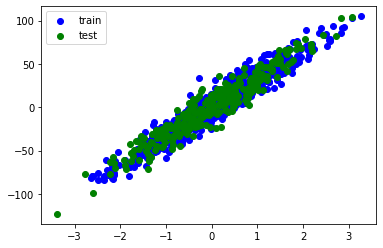

In [4]:
from sklearn import model_selection

# 7:3 비율로 랜덤 샘플하여 Train/Test 셋 분리
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=rseed)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

### Model Training & Evaluation

학습 데이터를 이용해서 LinearRegression 모델을 훈련 시키고 평가까지 진행해 보겠습니다. 

coefficient=[33.055]
intercept=0.6014892183390894
r_square=0.91883


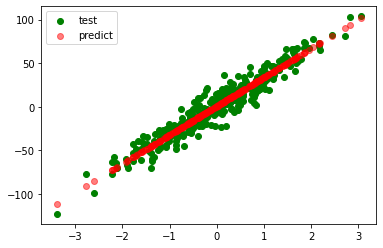

In [7]:
from sklearn import linear_model, metrics

# 모델 - 파라미터 값들은 모두 기본 값으로 사용합니다
model = linear_model.LinearRegression()

# 학습
model.fit(train_xs, train_ys)

# 선형 회귀 모델링을 통해 얻은 coefficient, intercept 입니다.
print(f"coefficient={model.coef_}")
print(f"intercept={model.intercept_}")

# 평가: 테스트 데이터에 대해서 R2 값을 구합니다. R2 는 1.0 에 가까울 수록 선형 회귀 모델이 데이터를 잘 설명하고 있다는 것입니다.
pred_ys = model.predict(test_xs)
r_square = metrics.r2_score(test_ys, pred_ys)
# r2 값은 model.score 함수를 통해 구할수도 있습니다.
# r_square = model.score(test_xs, test_ys)
print(f"r_square={r_square:.5f}")

plt.scatter(test_xs, test_ys, label='test', c='g')
plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
plt.legend()
plt.show()

### Model Persistence

한번 학습한 모델을 나중에 필요시 다시 사용하기 위해 모델을 저장하였다가 로드하여 사용해 봅니다.

In [8]:
import joblib

# 모델 저장/로드
path_model = "/tmp/model.joblib"
joblib.dump(model, path_model)
model = joblib.load(path_model)

# 재평가
pred_ys = model.predict(test_xs)
r_square = metrics.r2_score(test_ys, pred_ys)
print(f"r_square={r_square:.5f}")


r_square=0.91883


여기까지 Scikit-Learn 으로 모델링을 진행하는 주요 과정을 빠르게 살펴 보았습니다. 이후 부터는 Scikit-Learn 문서 및 상세 예제들을 통해 다양한 모델링 기법들을 익혀 나가면 됩니다.